In [1]:
#!pip install -U scikit-fuzzy
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from google.colab import files
 
uploaded = files.upload()

Saving Untitled spreadsheet.xlsx to Untitled spreadsheet.xlsx


In [2]:
step1 = pd.read_excel('Untitled spreadsheet.xlsx')
step1
number_person=step1["Consentement"].count()
number_person

468

In [3]:
step2 = step1.loc[(step1['Consentement'] == 1)]
step2

,No,Code d'utilisateur,No Groupe,Consentement,genre,age,situation_prof,niv_etude,perte_emploi,aide_fin_gouv,...,Idedi_t2,Iaedi_t2,UPEies_t,EPRies_t2,HSCies_t2,BCCies_t2,TOTies_t2,RESedeq_t2,Ecedeq_t2,OSA_t2.1
0,1,3387819,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,3387859,NaN,1.0,2.0,42.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,3387866,NaN,1.0,2.0,30.0,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,3387868,1.0,1.0,2.0,22.0,4.0,4.0,NaN,NaN,...,3.0,1.0,4.83,4.63,3.17,3.67,4.17,0.4,0.2,2.75875
7,8,3387878,1.0,1.0,2.0,24.0,3.0,NaN,NaN,NaN,...,1.0,2.0,4.33,3.63,4.17,4.00,4.00,0.6,0.2,2.86625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2453,2454,3483398,NaN,1.0,1.0,30.0,6.0,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2456,2457,3483412,2.0,1.0,NaN,24.0,3.0,NaN,NaN,NaN,...,6.0,7.0,2.00,2.38,3.00,5.00,2.78,1.6,1.0,3.09500
2784,2785,3486368,NaN,1.0,2.0,14.0,4.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2785,2786,3486409,1.0,1.0,2.0,18.0,4.0,2.0,NaN,NaN,...,0.0,3.0,3.17,4.25,4.33,5.00,4.09,0.0,0.0,2.98000


#Input subscales

In [4]:
A=['RESedeq_t2',
 'Buedi_t2',
 'Bdedi_t2',
 'BCCies_t2',
 'EPRies_t2',
 'HSCies_t2',
 'UPEies_t','genre','IMC','age']

In [5]:
step3=step2[A]
ste4=step3.replace(step3['RESedeq_t2'][0], 'p')


all_elements_in_row_nan=ste4.query('RESedeq_t2==Buedi_t2==Bdedi_t2==BCCies_t2==EPRies_t2==HSCies_t2==UPEies_t ')
step4=step3.drop(all_elements_in_row_nan.index)
step4.info()
Step4=step4

<class 'pandas.core.frame.DataFrame'>
Int64Index: 317 entries, 6 to 2790
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RESedeq_t2  312 non-null    float64
 1   Buedi_t2    290 non-null    float64
 2   Bdedi_t2    286 non-null    float64
 3   BCCies_t2   296 non-null    float64
 4   EPRies_t2   297 non-null    float64
 5   HSCies_t2   291 non-null    float64
 6   UPEies_t    297 non-null    float64
 7   genre       316 non-null    float64
 8   IMC         312 non-null    float64
 9   age         311 non-null    float64
dtypes: float64(10)
memory usage: 27.2 KB


In [6]:


Ai=np.array([step4['RESedeq_t2'].count(),step4['Buedi_t2'].count(),step4['Bdedi_t2'].count(),step4['BCCies_t2'].count()
,step4['EPRies_t2'].count(),step4['HSCies_t2'].count(),step4['UPEies_t'].count()])
print(str(Ai),str((1-(np.sum(Ai)/(len(Ai)*317)))*100)) 

step4.describe()


[312 290 286 296 297 291 297] 6.759801712483105


,RESedeq_t2,Buedi_t2,Bdedi_t2,BCCies_t2,EPRies_t2,HSCies_t2,UPEies_t,genre,IMC,age
count,312.000000,290.000000,286.000000,296.000000,297.000000,291.000000,297.000000,316.000000,312.000000,311.000000
mean,1.410897,2.251724,6.349650,3.887432,3.233199,3.049828,3.337205,1.911392,28.252663,36.736334
std,1.687483,2.533256,2.784062,0.873148,0.803482,1.071838,0.955930,0.335796,10.987324,14.517884
min,0.000000,0.000000,1.000000,1.330000,1.500000,1.000000,1.000000,1.000000,0.000000,14.000000
25%,0.000000,0.000000,4.000000,3.330000,2.630000,2.170000,2.670000,2.000000,21.588073,25.000000
50%,0.700000,1.000000,6.000000,4.000000,3.250000,3.000000,3.330000,2.000000,25.008481,33.000000
75%,2.000000,4.000000,9.000000,4.670000,3.880000,3.830000,4.000000,2.000000,31.218437,47.000000
max,6.000000,10.000000,11.000000,5.000000,5.000000,5.000000,5.000000,4.000000,89.790752,85.000000


In [7]:
Step4=step4.copy().interpolate()
Step4.describe()

,RESedeq_t2,Buedi_t2,Bdedi_t2,BCCies_t2,EPRies_t2,HSCies_t2,UPEies_t,genre,IMC,age
count,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000
mean,1.408833,2.255521,6.337539,3.888596,3.236009,3.058644,3.334842,1.911672,28.208162,36.777603
std,1.676905,2.467500,2.706776,0.858347,0.784328,1.048042,0.935457,0.335301,10.921940,14.443207
min,0.000000,0.000000,1.000000,1.330000,1.500000,1.000000,1.000000,1.000000,0.000000,14.000000
25%,0.000000,0.000000,4.000000,3.330000,2.630000,2.223333,2.670000,2.000000,21.579130,25.000000
50%,0.800000,1.500000,6.000000,4.000000,3.250000,3.000000,3.330000,2.000000,24.977043,33.000000
75%,2.000000,3.500000,8.500000,4.335000,3.880000,3.830000,4.000000,2.000000,31.217482,47.000000
max,6.000000,10.000000,11.000000,5.000000,5.000000,5.000000,5.000000,4.000000,89.790752,85.000000


In [8]:
step4=step1.iloc[step4.index]
step4

,No,Code d'utilisateur,No Groupe,Consentement,genre,age,situation_prof,niv_etude,perte_emploi,aide_fin_gouv,...,Idedi_t2,Iaedi_t2,UPEies_t,EPRies_t2,HSCies_t2,BCCies_t2,TOTies_t2,RESedeq_t2,Ecedeq_t2,OSA_t2.1
6,7,3387868,1.0,1.0,2.0,22.0,4.0,4.0,NaN,NaN,...,3.0,1.0,4.83,4.63,3.17,3.67,4.17,0.4,0.2,2.75875
7,8,3387878,1.0,1.0,2.0,24.0,3.0,NaN,NaN,NaN,...,1.0,2.0,4.33,3.63,4.17,4.00,4.00,0.6,0.2,2.86625
11,12,3387923,2.0,1.0,2.0,48.0,3.0,NaN,NaN,NaN,...,3.0,4.0,3.17,2.63,3.00,4.00,3.04,1.0,0.2,2.63000
20,21,3387967,2.0,1.0,2.0,55.0,1.0,NaN,NaN,NaN,...,2.0,3.0,3.67,3.13,2.67,4.00,3.26,0.0,0.0,2.46625
23,24,3387985,1.0,1.0,2.0,33.0,4.0,2.0,NaN,NaN,...,0.0,1.0,5.00,4.50,4.67,5.00,4.74,0.0,0.0,3.11375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2201,2202,3475348,1.0,1.0,2.0,25.0,3.0,NaN,NaN,NaN,...,2.0,3.0,4.67,4.50,5.00,5.00,4.74,0.0,0.0,3.36375
2204,2205,3476064,NaN,1.0,2.0,NaN,4.0,2.0,NaN,NaN,...,1.0,0.0,4.83,4.13,NaN,NaN,NaN,0.0,0.0,1.79200
2456,2457,3483412,2.0,1.0,NaN,24.0,3.0,NaN,NaN,NaN,...,6.0,7.0,2.00,2.38,3.00,5.00,2.78,1.6,1.0,3.09500
2785,2786,3486409,1.0,1.0,2.0,18.0,4.0,2.0,NaN,NaN,...,0.0,3.0,3.17,4.25,4.33,5.00,4.09,0.0,0.0,2.98000


In [9]:
print(len(step4.query('Consentement==1 and genre==1')))
print(len(step4.query('Consentement==1 and genre==2')))
print(len(step4.query('Consentement==1 and genre!=1 and genre!=2')))


32
281
4


In [10]:
s=step4.transpose()
S=[s.columns]
S

[Int64Index([   6,    7,   11,   20,   23,   26,   31,   33,   37,   38,
             ...
             2038, 2042, 2046, 2062, 2074, 2201, 2204, 2456, 2785, 2790],
            dtype='int64', length=317)]

In [11]:
step4=step4.interpolate()
step4.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 317 entries, 6 to 2790
Columns: 255 entries, No to OSA_t2.1
dtypes: float64(203), int64(3), object(49)
memory usage: 634.0+ KB


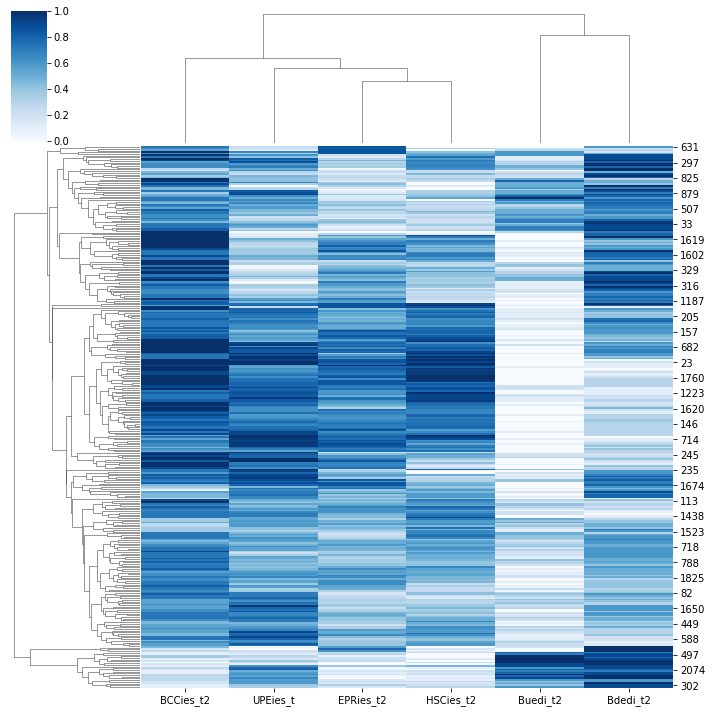

In [12]:
sns.clustermap(step4[['Buedi_t2','Bdedi_t2','BCCies_t2','EPRies_t2','HSCies_t2','UPEies_t']], cmap='Blues', standard_scale= 1)
# plt.savefig('drop RESedeq_t2.png')

In [13]:
print(len(step4.loc[(step4['genre'] == 1)]))
print(len(step4.loc[(step4['genre'] == 2)]))
step4.query('genre != 1 and genre!=2')

32
282


,No,Code d'utilisateur,No Groupe,Consentement,genre,age,situation_prof,niv_etude,perte_emploi,aide_fin_gouv,...,Idedi_t2,Iaedi_t2,UPEies_t,EPRies_t2,HSCies_t2,BCCies_t2,TOTies_t2,RESedeq_t2,Ecedeq_t2,OSA_t2.1
1199,1200,3400755,2.0,1.0,3.0,25.0,4.0,4.00,2.0,NaN,...,4.0,5.0,3.665,3.315,2.25,4.00,3.215,4.0,0.4,4.00000
1331,1332,3404215,2.0,1.0,3.0,28.0,3.0,4.25,2.0,NaN,...,7.0,7.0,4.000,2.630,2.33,3.67,3.040,0.2,0.4,2.90875
1549,1550,3413382,1.0,1.0,4.0,26.0,4.0,3.00,2.0,NaN,...,7.0,6.0,4.330,2.630,2.50,3.67,3.170,0.0,0.8,2.88750


In [14]:
step4[A].describe()


,RESedeq_t2,Buedi_t2,Bdedi_t2,BCCies_t2,EPRies_t2,HSCies_t2,UPEies_t,genre,IMC,age
count,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000
mean,1.408833,2.255521,6.337539,3.888596,3.236009,3.058644,3.334842,1.911672,28.208162,36.777603
std,1.676905,2.467500,2.706776,0.858347,0.784328,1.048042,0.935457,0.335301,10.921940,14.443207
min,0.000000,0.000000,1.000000,1.330000,1.500000,1.000000,1.000000,1.000000,0.000000,14.000000
25%,0.000000,0.000000,4.000000,3.330000,2.630000,2.223333,2.670000,2.000000,21.579130,25.000000
50%,0.800000,1.500000,6.000000,4.000000,3.250000,3.000000,3.330000,2.000000,24.977043,33.000000
75%,2.000000,3.500000,8.500000,4.335000,3.880000,3.830000,4.000000,2.000000,31.217482,47.000000
max,6.000000,10.000000,11.000000,5.000000,5.000000,5.000000,5.000000,4.000000,89.790752,85.000000


# old label according to previous 3 clusters

In [15]:
Bdedi_t2_1=step4.query('Bdedi_t2 <= 5.12').index
Bdedi_t2_2=step4.query('5.12 <= Bdedi_t2 <= 9.28').index
Bdedi_t2_3=step4.query('9.28 <= Bdedi_t2 ').index


In [16]:
Bdedi_t2_1=step4.query('Bdedi_t2 <= 5.12').index
Bdedi_t2_2=step4.query('5.12 <= Bdedi_t2 <= 9.28').index
Bdedi_t2_3=step4.query('9.28 <= Bdedi_t2 ').index


RESedeq_t2_1=step4.query(' RESedeq_t2 < 0.11').index
RESedeq_t2_2=step4.query(' 0.11 <= RESedeq_t2 <= 3.69 ').index
RESedeq_t2_3=step4.query('3.69 < RESedeq_t2 ').index

Buedi_t2_1=step4.query('Buedi_t2 < 0.18').index
Buedi_t2_2=step4.query(' 0.18 <= Buedi_t2 <= 3.62').index
Buedi_t2_3=step4.query('Buedi_t2 > 3.62 ').index

UPEies_t_3=step4.query('UPEies_t < 2.17').index
UPEies_t_2=step4.query('  2.17 <= UPEies_t <= 4.03 ').index
UPEies_t_1=step4.query('UPEies_t > 4.03').index

BCCies_t2_3=step4.query('BCCies_t2 <3.25  ').index
BCCies_t2_2=step4.query(' 3.25 <= BCCies_t2 <= 4.75').index
BCCies_t2_1=step4.query('BCCies_t2 > 4.75 ').index

EPRies_t2_3=step4.query('EPRies_t2 < 2.52').index
EPRies_t2_2=step4.query(' 2.52 <= EPRies_t2 <= 3.88').index
EPRies_t2_1=step4.query('EPRies_t2 > 3.88').index

HSCies_t2_3=step4.query('HSCies_t2 < 2').index
HSCies_t2_2=step4.query(' 2 <= HSCies_t2 <= 3.8').index
HSCies_t2_1=step4.query('HSCies_t2 > 3.8').index



In [17]:
len(step4)

317

In [18]:
Bdedi_t2_labels=[]
for i in step4.index :
  if i in Bdedi_t2_1:
    Bdedi_t2_labels.append(1)
  if i in Bdedi_t2_2:
    Bdedi_t2_labels.append(2)
  if i in Bdedi_t2_3:
    Bdedi_t2_labels.append(3)
  
print(len(Bdedi_t2_labels))

RESedeq_t2_labels=[]
for i in step4.index :
  if i in RESedeq_t2_1:
    RESedeq_t2_labels.append(1)
  if i in RESedeq_t2_2:
    RESedeq_t2_labels.append(2)
  if i in RESedeq_t2_3:
    RESedeq_t2_labels.append(3)
print(len(RESedeq_t2_labels))

Buedi_t2_labels=[]
for i in step4.index :
  if i in Buedi_t2_1:
    Buedi_t2_labels.append(1)
  if i in Buedi_t2_2:
    Buedi_t2_labels.append(2)
  if i in Buedi_t2_3:
    Buedi_t2_labels.append(3)
print(len(Buedi_t2_labels))
UPEies_t_labels=[]
for i in step4.index :
  if i in UPEies_t_1:
    UPEies_t_labels.append(1)
  if i in UPEies_t_2:
    UPEies_t_labels.append(2)
  if i in UPEies_t_3:
    UPEies_t_labels.append(3)
print(len(UPEies_t_labels))

BCCies_t2_labels=[]
for i in step4.index :
  if i in BCCies_t2_1:
    BCCies_t2_labels.append(1)
  if i in BCCies_t2_2:
    BCCies_t2_labels.append(2)
  if i in BCCies_t2_3:
    BCCies_t2_labels.append(3)
print(len(BCCies_t2_labels))

EPRies_t2_labels=[]
for i in step4.index :
  if i in EPRies_t2_1:
    EPRies_t2_labels.append(1)
  if i in EPRies_t2_2:
    EPRies_t2_labels.append(2)
  if i in EPRies_t2_3:
    EPRies_t2_labels.append(3)
print(len(EPRies_t2_labels))

HSCies_t2_labels=[]
for i in step4.index :
  if i in HSCies_t2_1:
    HSCies_t2_labels.append(1)
  if i in HSCies_t2_2:
    HSCies_t2_labels.append(2)
  if i in HSCies_t2_3:
    HSCies_t2_labels.append(3)
print(len(HSCies_t2_labels))


317
317
317
317
317
317
317


In [19]:
list_labels=[]
for j in range(len(step4)):
  temp=[]
  temp.append(Bdedi_t2_labels[j])
  temp.append(RESedeq_t2_labels[j])
  temp.append(Buedi_t2_labels[j])
  temp.append(UPEies_t_labels[j])
  temp.append(BCCies_t2_labels[j])
  temp.append(EPRies_t2_labels[j])
  temp.append(HSCies_t2_labels[j])
  list_labels.append(temp)
print(list_labels)


[[1, 2, 2, 1, 2, 1, 2], [1, 2, 1, 1, 2, 2, 1], [2, 2, 2, 2, 2, 2, 2], [2, 1, 2, 2, 2, 2, 2], [1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 2, 1, 1], [1, 1, 1, 2, 2, 2, 1], [3, 3, 3, 2, 2, 2, 2], [3, 1, 3, 1, 2, 1, 2], [2, 2, 3, 1, 2, 2, 2], [2, 1, 3, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2, 3], [2, 2, 3, 2, 3, 3, 3], [2, 2, 1, 2, 1, 1, 2], [1, 1, 1, 2, 2, 1, 1], [1, 2, 2, 2, 2, 3, 2], [3, 2, 3, 2, 3, 3, 2], [3, 2, 3, 3, 3, 3, 2], [1, 2, 2, 2, 2, 2, 1], [2, 2, 1, 3, 1, 2, 1], [2, 2, 1, 2, 1, 1, 2], [1, 2, 1, 1, 2, 3, 2], [2, 2, 1, 2, 3, 2, 2], [1, 2, 1, 2, 2, 1, 1], [1, 1, 1, 1, 2, 1, 2], [2, 3, 2, 3, 1, 2, 2], [2, 2, 2, 2, 1, 2, 2], [2, 2, 1, 2, 2, 1, 1], [1, 2, 2, 2, 1, 2, 2], [1, 1, 2, 1, 2, 2, 2], [1, 2, 2, 2, 2, 2, 2], [1, 2, 2, 2, 2, 2, 2], [1, 1, 1, 3, 1, 1, 1], [1, 2, 2, 2, 2, 2, 1], [3, 3, 3, 3, 3, 3, 3], [3, 2, 2, 2, 2, 3, 1], [1, 1, 1, 2, 2, 1, 1], [2, 2, 3, 2, 2, 3, 1], [1, 1, 1, 1, 1, 1, 1], [2, 2, 3, 2, 2, 2, 2], [1, 1, 3, 1, 2, 3, 1], [1, 1, 2, 1, 1, 2, 2], [1, 1, 1, 1, 2, 1, 1], [3, 1, 1, 

# Control System and final label

In [20]:
te=[]
membership_rate=[]
for i in range(len(list_labels)):
  temp=[]
  a=list_labels[i].count(1)/7
  b=list_labels[i].count(2)/7
  c=list_labels[i].count(3)/7
  temp.append([a,b,c])
  '''we can add treshhold here with if not pass minimum of requirement'''
  membership_rate.append([temp,temp[0].index(max(temp[0]))+1])
  te.append((temp[0].index(max(temp[0])))+1)
print(te.count(1))
print(te.count(2))
print(te.count(3))
# Bdedi_t2_labels
# RESedeq_t2_labels
# Buedi_t2_labels
# UPEies_t_labels
# BCCies_t2_labels
# EPRies_t2_labels
# HSCies_t2_labels

80
203
34


##Making imagine datasets

In [21]:

A=['RESedeq_t2',
 'Buedi_t2',
 'Bdedi_t2',
 'BCCies_t2',
 'EPRies_t2',
 'HSCies_t2',
 'UPEies_t']
# input tr

n_C=int(input('please enter number of cluster:'))
print('if you have 6 columns, want to delet 1 column per cluster, should enter 5')
print('if you have 6 columns, want to delet 1,2 columns per cluster, should enter 4')
minimum_number_of_feature_in_Dataset_for_clustring=int(input('please input minimum number of features for clustering:'))
# a=min(len(step1.columns),minimum_number_of_feature_in_Dataset_for_clustring)
tr=float(input('please enter mount of threshold:'))
a=6
from itertools import combinations
datasets=[]
for z in range(a,len(A)+1):
  temp = list(combinations(A, z))
  for i in list(temp):
    datasets.append(i)
for t in range(len(datasets)):
  datasets[t]=[str('droped:')+str(list(set(A)-set(list(datasets[t])))),[list(datasets[t])]]
datasets
# RESedeq_t2,Buedi_t2,Bdedi_t2,BCCies_t2,EPRies_t2,HSCies_t2,UPEies_t

please enter number of cluster:7
if you have 6 columns, want to delet 1 column per cluster, should enter 5
if you have 6 columns, want to delet 1,2 columns per cluster, should enter 4
please input minimum number of features for clustering:6
please enter mount of threshold:0.05


[["droped:['UPEies_t']",
  [['RESedeq_t2',
    'Buedi_t2',
    'Bdedi_t2',
    'BCCies_t2',
    'EPRies_t2',
    'HSCies_t2']]],
 ["droped:['HSCies_t2']",
  [['RESedeq_t2',
    'Buedi_t2',
    'Bdedi_t2',
    'BCCies_t2',
    'EPRies_t2',
    'UPEies_t']]],
 ["droped:['EPRies_t2']",
  [['RESedeq_t2',
    'Buedi_t2',
    'Bdedi_t2',
    'BCCies_t2',
    'HSCies_t2',
    'UPEies_t']]],
 ["droped:['BCCies_t2']",
  [['RESedeq_t2',
    'Buedi_t2',
    'Bdedi_t2',
    'EPRies_t2',
    'HSCies_t2',
    'UPEies_t']]],
 ["droped:['Bdedi_t2']",
  [['RESedeq_t2',
    'Buedi_t2',
    'BCCies_t2',
    'EPRies_t2',
    'HSCies_t2',
    'UPEies_t']]],
 ["droped:['Buedi_t2']",
  [['RESedeq_t2',
    'Bdedi_t2',
    'BCCies_t2',
    'EPRies_t2',
    'HSCies_t2',
    'UPEies_t']]],
 ["droped:['RESedeq_t2']",
  [['Buedi_t2',
    'Bdedi_t2',
    'BCCies_t2',
    'EPRies_t2',
    'HSCies_t2',
    'UPEies_t']]],
 ['droped:[]',
  [['RESedeq_t2',
    'Buedi_t2',
    'Bdedi_t2',
    'BCCies_t2',
    'EPRies_t2'

### Clustering Algorithms

# Agglomerative Clustering with origianl dataframe

droped:['UPEies_t']


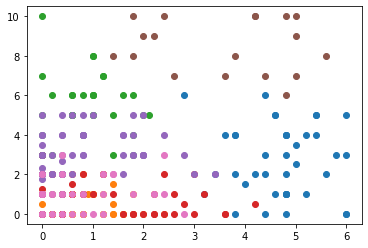

droped:['HSCies_t2']


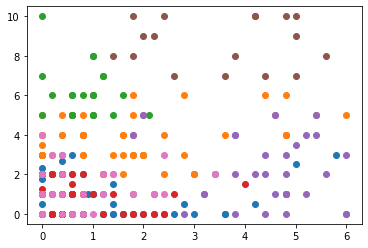

droped:['EPRies_t2']


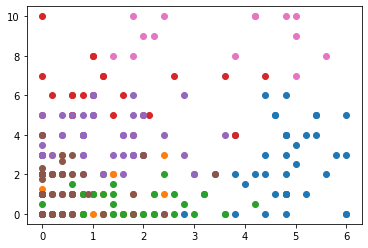

droped:['BCCies_t2']


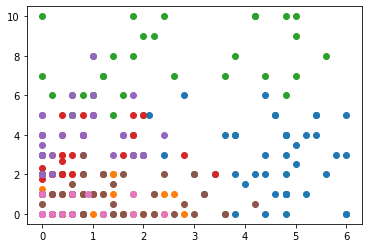

droped:['Bdedi_t2']


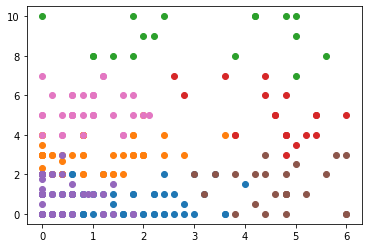

droped:['Buedi_t2']


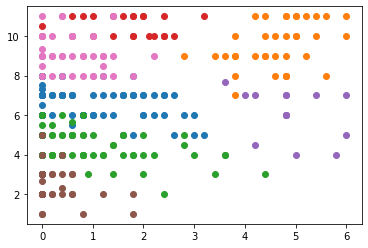

droped:['RESedeq_t2']


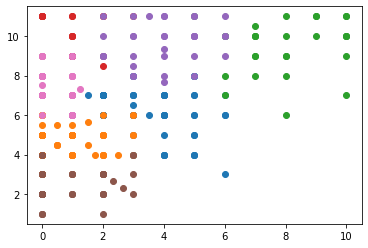

droped:[]


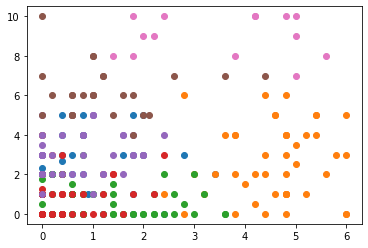

In [ ]:
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot


X_embedded=[]
labels_nocomps=[]
for i in range (0,len(datasets)):
    df=datasets[i][1][0]
    
    XXXX=np.array(step4[datasets[i][1][0]])
   
    # define dataset
    XX=XXXX
    # define the model
    model = AgglomerativeClustering(n_clusters=n_C, affinity='euclidean', linkage='ward')
    # fit the model
    model.fit(XX)
    # assign a cluster to each example
    yhat = model.fit_predict(XX)
    labels_nocomps.append(yhat)
    # retrieve unique clusters
    clusters = unique(yhat)
    # create scatter plot for samples from each cluster
    for cluster in clusters:
	# get row indexes for samples with this cluster
        row_ix = where(yhat == cluster)
	# create scatter of these samples
        pyplot.scatter(XX[row_ix, 0], XX[row_ix, 1])
    # show the plot
    
    print(datasets[i][0])
    pyplot.show()
    

# GaussianMixture Clustering with origianl dataframe

droped:['UPEies_t']


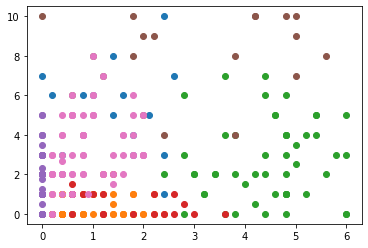

droped:['HSCies_t2']


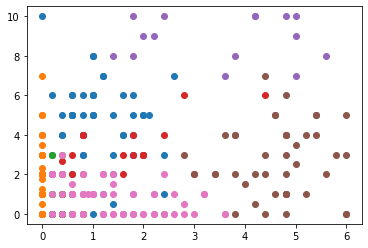

droped:['EPRies_t2']


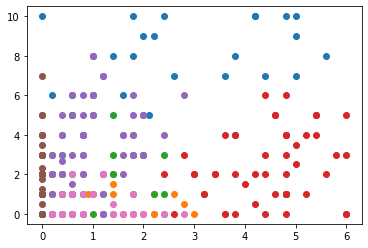

droped:['BCCies_t2']


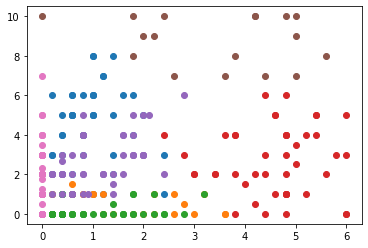

droped:['Bdedi_t2']


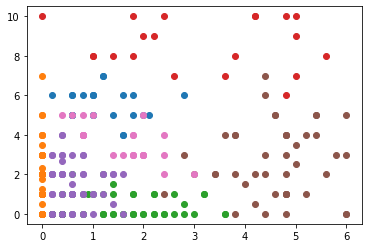

droped:['Buedi_t2']


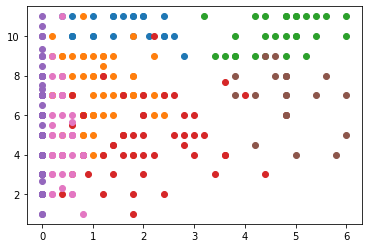

droped:['RESedeq_t2']


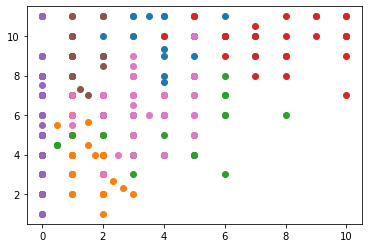

droped:[]


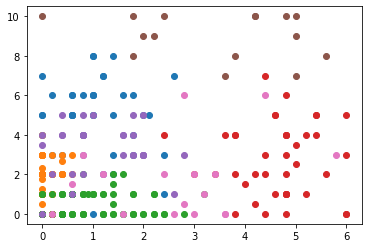

In [ ]:
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.mixture import GaussianMixture
from matplotlib import pyplot


X_embedded=[]
labels_nocomps=[]
for i in range (0,len(datasets)):
    df=datasets[i][1][0]
    
    XXXX=np.array(step4[datasets[i][1][0]])
   
    # gaussian mixture clustering

    # define dataset
    XX=XXXX
    # define the model
    model = GaussianMixture(n_components=n_C,random_state=10)
    # fit the model
    model.fit(XX)
    # assign a cluster to each example
    yhat = model.predict(XX)
    labels_nocomps.append(yhat)
    # retrieve unique clusters
    clusters = unique(yhat)
    # create scatter plot for samples from each cluster
    for cluster in clusters:
	# get row indexes for samples with this cluster
        row_ix = where(yhat == cluster)
	# create scatter of these samples
        pyplot.scatter(XX[row_ix, 0], XX[row_ix, 1])
    # show the plot
    
    print(datasets[i][0])
    pyplot.show()
    

# Agglomerative Clustering with apply PCA

droped:['UPEies_t']


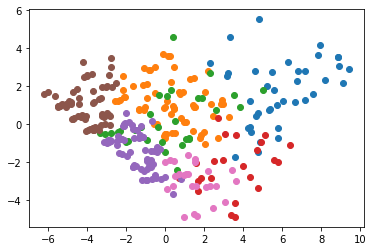

droped:['HSCies_t2']


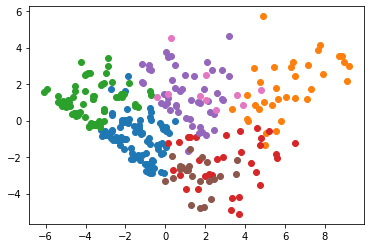

droped:['EPRies_t2']


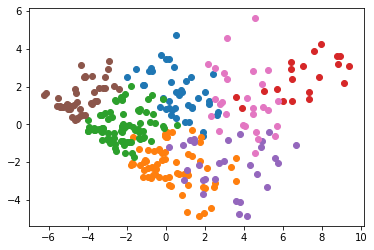

droped:['BCCies_t2']


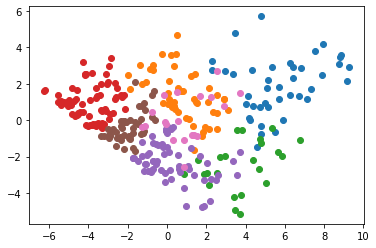

droped:['Bdedi_t2']


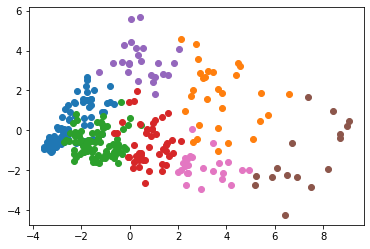

droped:['Buedi_t2']


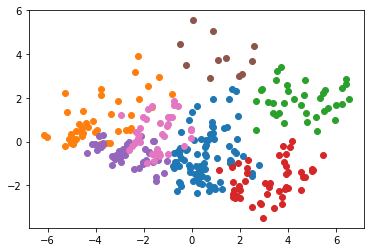

droped:['RESedeq_t2']


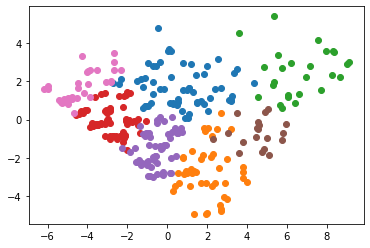

droped:[]


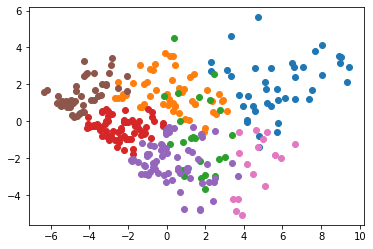

In [ ]:
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot
from sklearn.decomposition import PCA
X_embedded=[]
labels_pca=[]
for i in range (0,len(datasets)):
    df=datasets[i][1][0]
    
    XXX=np.array(step4[datasets[i][1][0]])
    pca = PCA(n_components=3, random_state=10)
    pca.fit(XXX)
   
  

    # define dataset
    XX=pca.transform(XXX)
    # define the model
    model = AgglomerativeClustering(n_clusters=n_C, affinity='euclidean', linkage='ward')
    # fit the model
    model.fit(XX)
    # assign a cluster to each example
    yhat = model.fit_predict(XX)
    labels_pca.append(yhat)
    # retrieve unique clusters
    clusters = unique(yhat)
    # create scatter plot for samples from each cluster
    for cluster in clusters:
	# get row indexes for samples with this cluster
        row_ix = where(yhat == cluster)
	# create scatter of these samples
        pyplot.scatter(XX[row_ix, 0], XX[row_ix, 1])
    # show the plot
    
    print(datasets[i][0])
    pyplot.show()
    

# GaussianMixture Clustering with PCA

droped:['UPEies_t']


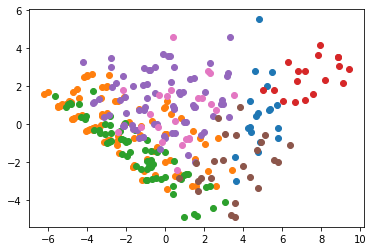

droped:['HSCies_t2']


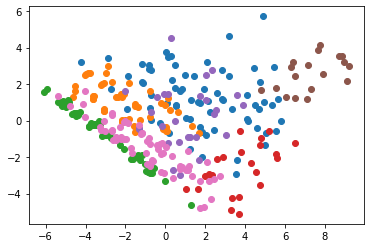

droped:['EPRies_t2']


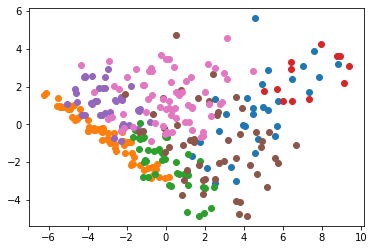

droped:['BCCies_t2']


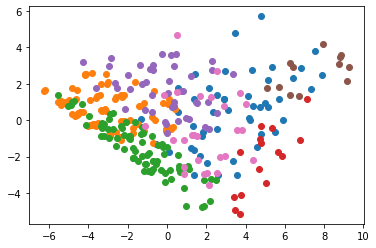

droped:['Bdedi_t2']


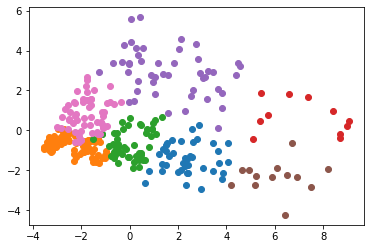

droped:['Buedi_t2']


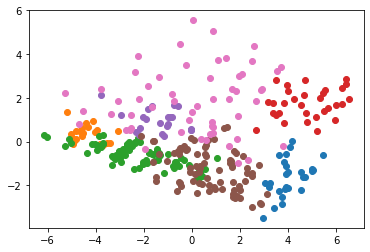

droped:['RESedeq_t2']


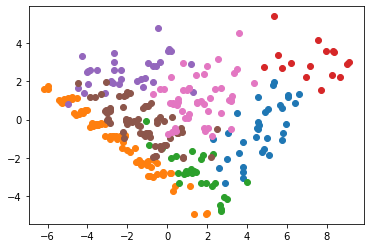

droped:[]


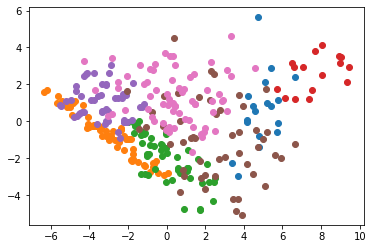

In [ ]:
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.mixture import GaussianMixture
from matplotlib import pyplot
from sklearn.decomposition import PCA
X_embedded=[]
labels_pca=[]
for i in range (0,len(datasets)):
    df=datasets[i][1][0]
    
    XXX=np.array(step4[datasets[i][1][0]])
    pca = PCA(n_components=3,random_state=10)
    pca.fit(XXX)
   
    # gaussian mixture clustering

    # define dataset
    XX=pca.transform(XXX)
    # define the model
    model = GaussianMixture(n_components=n_C,random_state=10)
    # fit the model
    model.fit(XX)
    # assign a cluster to each example
    yhat = model.predict(XX)
    labels_pca.append(yhat)
    # retrieve unique clusters
    clusters = unique(yhat)
    # create scatter plot for samples from each cluster
    for cluster in clusters:
	# get row indexes for samples with this cluster
        row_ix = where(yhat == cluster)
	# create scatter of these samples
        pyplot.scatter(XX[row_ix, 0], XX[row_ix, 1])
    # show the plot
    
    print(datasets[i][0])
    pyplot.show()
    

# Agglomerative Clustering with apply TSNE

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


droped:['UPEies_t']


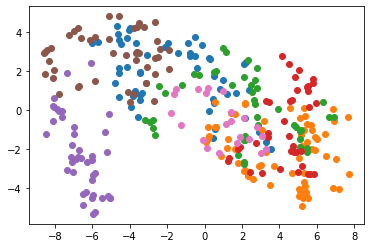

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


droped:['HSCies_t2']


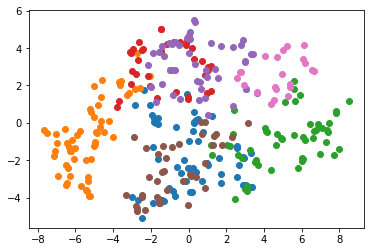

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


droped:['EPRies_t2']


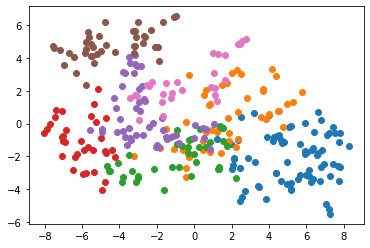

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


droped:['BCCies_t2']


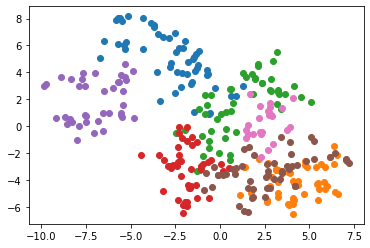

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


droped:['Bdedi_t2']


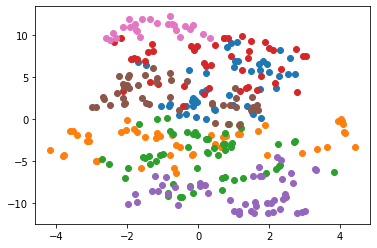

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


droped:['Buedi_t2']


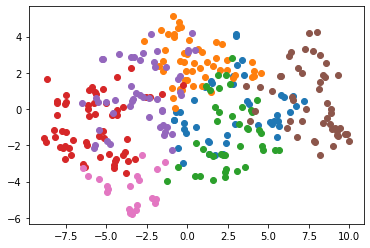

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


droped:['RESedeq_t2']


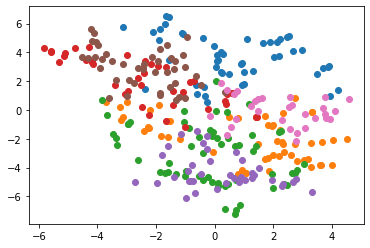

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


droped:[]


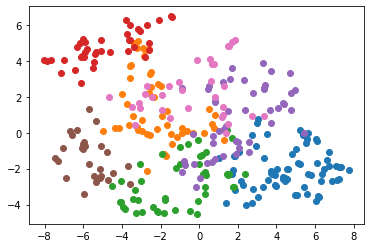

In [ ]:
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from matplotlib import pyplot
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering

X_embedded=[]
labels=[]
for i in range (0,len(datasets)):
    df=datasets[i][1][0]
    
    X=np.array(step4[datasets[i][1][0]])
    tsne = TSNE(n_components=3,perplexity=15.0,learning_rate=10, n_iter=10000,random_state=10)
    X_embedded.append(tsne.fit_transform(X))
   
   
   
    
    # define dataset
    XX=tsne.fit_transform(X)
    # define the model
    model = AgglomerativeClustering(n_clusters=n_C, affinity='euclidean', linkage='ward')
    # fit the model
    model.fit(XX)
    # assign a cluster to each example
    yhat = model.fit_predict(XX)
    labels.append(yhat)
    # retrieve unique clusters
    clusters = unique(yhat)
    # create scatter plot for samples from each cluster
    for cluster in clusters:
	# get row indexes for samples with this cluster
        row_ix = where(yhat == cluster)
	# create scatter of these samples
        pyplot.scatter(XX[row_ix, 0], XX[row_ix, 1])
    # show the plot
    plt.savefig(str(datasets[i][0])+'.png')
    print(datasets[i][0])
    pyplot.show()
    

# GaussianMixture Clustering with TSNE

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


droped:['UPEies_t']


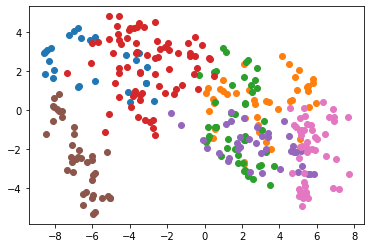

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


droped:['HSCies_t2']


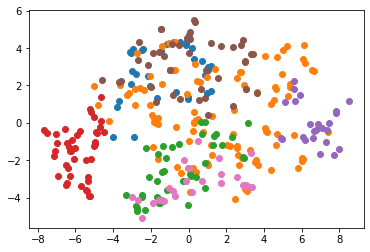

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


droped:['EPRies_t2']


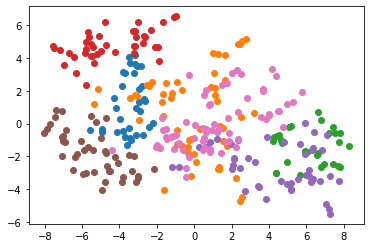

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


droped:['BCCies_t2']


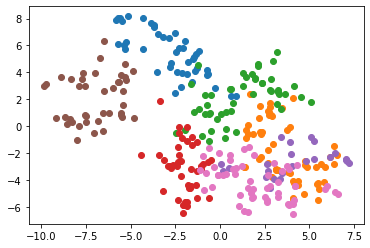

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


droped:['Bdedi_t2']


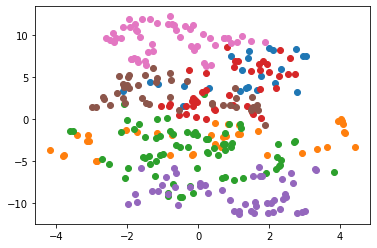

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


droped:['Buedi_t2']


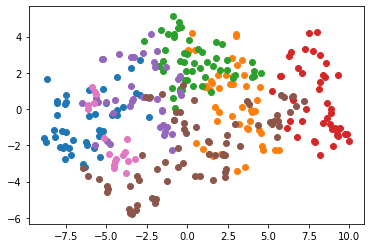

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


droped:['RESedeq_t2']


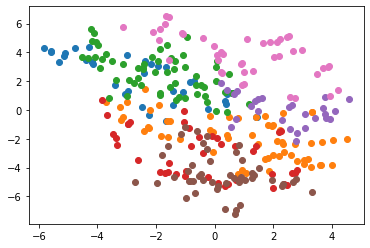

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


droped:[]


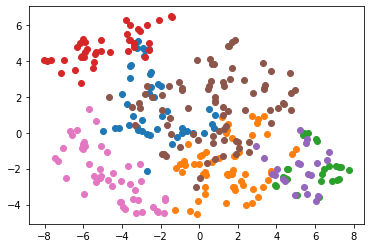

In [22]:
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.mixture import GaussianMixture
from matplotlib import pyplot
from sklearn.manifold import TSNE


X_embedded=[]
labels=[]
for i in range (0,len(datasets)):
    df=datasets[i][1][0]
    
  
    X=np.array(step4[datasets[i][1][0]])
    tsne = TSNE(n_components=3,perplexity=15.0,learning_rate=10, n_iter=10000,random_state=10 )
    X_embedded.append(tsne.fit_transform(X))
   
   
   
    
    # define dataset
    XX=tsne.fit_transform(X)
    # define the model
    model = GaussianMixture(n_components=n_C,random_state=10)
    # fit the model
    model.fit(XX)
    # assign a cluster to each example
    yhat = model.fit_predict(XX)
    labels.append(yhat)
    # retrieve unique clusters
    clusters = unique(yhat)
    # create scatter plot for samples from each cluster
    for cluster in clusters:
	# get row indexes for samples with this cluster
        row_ix = where(yhat == cluster)
	# create scatter of these samples
        pyplot.scatter(XX[row_ix, 0], XX[row_ix, 1])
    # show the plot
    plt.savefig(str(datasets[i][0])+'.png')
    print(datasets[i][0])
    pyplot.show()
    

#Analyze to find effective subscales

In [24]:
Labels=[]
for ii in range(len(labels)):
  a=[]
  for jj in range(len(clusters)):
    b=[]
    for qq in range(len(labels[ii])): 
      if labels[ii][qq]==jj:
        b.append(qq)
    a.append(b)
  Labels.append(a)



In [28]:
len(Labels[7])

7


#Table 1. Sociodemographic characteristics and BMIs by cluster

In [ ]:
for i in range(n_C):
  display(Step4.iloc[Labels[7][i]][['age', 'IMC','genre']].describe().loc[['count','mean','std','min','max']])
  print('genre=1:',np.count_nonzero(np.array(Step4.iloc[Labels[7][i]][['genre']]==1)))
  print('genre=2:',np.count_nonzero(np.array(Step4.iloc[Labels[7][i]][['genre']]==2)))
  print('genre!=1 and genre!=2:',abs(np.count_nonzero(np.array(Step4.iloc[Labels[7][i]][['genre']]!=2))-(np.count_nonzero(np.array(Step4.iloc[Labels[7][i]][['genre']]==1)))))

,age,IMC,genre
count,45.000000,45.000000,45.000000
mean,38.755556,35.296399,1.955556
std,15.021054,14.615052,0.208409
min,18.000000,15.241690,1.000000
max,74.000000,88.729224,2.000000


genre=1: 2
genre=2: 43
genre!=1 and genre!=2: 0


,age,IMC,genre
count,59.000000,59.000000,59.000000
mean,38.822034,25.978126,1.915254
std,16.538555,9.155202,0.427024
min,16.000000,0.000000,1.000000
max,85.000000,51.939058,4.000000


genre=1: 7
genre=2: 51
genre!=1 and genre!=2: 1


,age,IMC,genre
count,26.000000,26.000000,26.000000
mean,31.076923,23.678833,1.730769
std,13.214910,7.647486,0.452344
min,18.000000,18.832392,1.000000
max,80.000000,58.769513,2.000000


genre=1: 7
genre=2: 19
genre!=1 and genre!=2: 0


,age,IMC,genre
count,40.000000,40.000000,40.000000
mean,35.662500,28.405144,1.975000
std,13.716632,11.495741,0.276192
min,18.000000,13.182802,1.000000
max,64.000000,69.204152,3.000000


genre=1: 2
genre=2: 37
genre!=1 and genre!=2: 1


,age,IMC,genre
count,22.000000,22.000000,22.000000
mean,39.000000,25.401697,1.818182
std,15.766148,9.982565,0.394771
min,18.000000,16.901028,1.000000
max,69.000000,57.629387,2.000000


genre=1: 4
genre=2: 18
genre!=1 and genre!=2: 0


,age,IMC,genre
count,79.000000,79.000000,79.000000
mean,35.094937,27.258868,1.911392
std,12.984971,10.570756,0.285992
min,14.000000,14.568158,1.000000
max,81.000000,89.790752,2.000000


genre=1: 7
genre=2: 72
genre!=1 and genre!=2: 0


,age,IMC,genre
count,46.000000,46.000000,46.000000
mean,38.239130,29.495576,1.956522
std,13.584607,7.602538,0.294884
min,20.000000,10.651974,1.000000
max,67.000000,51.612903,3.000000


genre=1: 3
genre=2: 42
genre!=1 and genre!=2: 1


#Table 2. Descriptive statistics for eating attitudes and behaviors presented by cluster 

In [ ]:
for i in range(n_C):
  print('C'+str(i))
  display(Step4.iloc[Labels[7][i]][['RESedeq_t2','Buedi_t2','Bdedi_t2','BCCies_t2','EPRies_t2','HSCies_t2','UPEies_t']].describe().loc[['mean','std']])

C0


,RESedeq_t2,Buedi_t2,Bdedi_t2,BCCies_t2,EPRies_t2,HSCies_t2,UPEies_t
mean,1.895556,6.888889,9.329630,3.037111,2.239778,2.038185,3.018556
std,1.597719,1.885618,1.417998,1.061285,0.556228,0.724613,0.864016


C1


,RESedeq_t2,Buedi_t2,Bdedi_t2,BCCies_t2,EPRies_t2,HSCies_t2,UPEies_t
mean,0.349153,0.542373,4.680791,4.042373,3.670339,3.696610,3.889915
std,0.440365,0.690378,1.186727,0.670398,0.594439,0.726225,0.648294


C2


,RESedeq_t2,Buedi_t2,Bdedi_t2,BCCies_t2,EPRies_t2,HSCies_t2,UPEies_t
mean,0.226923,1.951923,3.000000,4.006538,3.411731,3.731538,4.115385
std,0.270640,0.708744,0.884433,0.582642,0.556810,0.748870,0.612269


C3


,RESedeq_t2,Buedi_t2,Bdedi_t2,BCCies_t2,EPRies_t2,HSCies_t2,UPEies_t
mean,4.710000,2.587500,8.391667,3.821375,3.098125,2.160917,2.162250
std,0.773868,1.701762,2.037941,0.819500,0.693030,0.788565,0.731701


C4


,RESedeq_t2,Buedi_t2,Bdedi_t2,BCCies_t2,EPRies_t2,HSCies_t2,UPEies_t
mean,0.381818,0.090909,2.000000,4.636818,4.064091,4.325909,3.810000
std,0.724823,0.294245,0.534522,0.447239,0.472981,0.825744,0.736943


C5


,RESedeq_t2,Buedi_t2,Bdedi_t2,BCCies_t2,EPRies_t2,HSCies_t2,UPEies_t
mean,1.448101,2.272152,5.734177,3.983101,3.186266,2.949241,3.139051
std,1.126927,1.716805,1.351247,0.737388,0.650907,0.758968,0.668934


C6


,RESedeq_t2,Buedi_t2,Bdedi_t2,BCCies_t2,EPRies_t2,HSCies_t2,UPEies_t
mean,0.513043,0.809783,8.746377,3.995978,3.363478,3.220761,3.619783
std,0.672841,0.911630,1.352519,0.785761,0.709856,0.983313,0.912780


#Semi-Final Result

In [ ]:
r=len(datasets)-1
Corresponding_clusters=[]
impressed=[]
nonimpressed=[]
for i in range(len(Labels)-1):
  b=[]
  qt=[]
  # ni=[]
  for j in range(n_C):
    a=[]
    for k in range(n_C):
      a.append(len(list(set(Labels[i][k]).intersection(set(Labels[r][j])))))
    temp=a.index(max(a))
    c=(max(a)/len(Labels[r][j]))
    g=1-c
    b.append([j,temp,c,g])
    qt.append(temp)
  # nonimpressed.append(ni)
  impressed.append([datasets[i][0],list(set(np.arange(n_C))-set(qt))])
  Corresponding_clusters.append([datasets[i][0],b])
print("two first elements are the Corresponding_clusters ")
Corresponding_clusters

two first elements is Corresponding_clusters 


[["droped:['UPEies_t']",
  [[0, 0, 0.6222222222222222, 0.37777777777777777],
   [1, 6, 0.4406779661016949, 0.5593220338983051],
   [2, 2, 0.9230769230769231, 0.07692307692307687],
   [3, 5, 0.975, 0.025000000000000022],
   [4, 6, 0.9545454545454546, 0.045454545454545414],
   [5, 3, 0.6708860759493671, 0.3291139240506329],
   [6, 4, 0.8043478260869565, 0.19565217391304346]]],
 ["droped:['HSCies_t2']",
  [[0, 0, 0.7111111111111111, 0.28888888888888886],
   [1, 1, 0.9491525423728814, 0.05084745762711862],
   [2, 1, 0.9615384615384616, 0.038461538461538436],
   [3, 2, 0.95, 0.050000000000000044],
   [4, 4, 0.9545454545454546, 0.045454545454545414],
   [5, 5, 0.3924050632911392, 0.6075949367088608],
   [6, 3, 0.9347826086956522, 0.06521739130434778]]],
 ["droped:['EPRies_t2']",
  [[0, 0, 0.7555555555555555, 0.24444444444444446],
   [1, 1, 0.4406779661016949, 0.5593220338983051],
   [2, 2, 1.0, 0.0],
   [3, 3, 1.0, 0.0],
   [4, 4, 0.9545454545454546, 0.045454545454545414],
   [5, 6, 0.620253

In [ ]:
nonimpressed=[]
for i in range(len(datasets)-1):
  l=[]
  for j in range(n_C):
    if Corresponding_clusters[i][1][j][3]<=tr:
      l.append(j)
  nonimpressed.append([Corresponding_clusters[i][0],l])
      


# Highest changes

In [ ]:
print('details of impressed')
for i in range(len(impressed)):
  b=[]
  a=[]
  for j in range((len(impressed[i][1]))):
    a=len(Labels[i][impressed[i][1][j]])
    d=[]
    for k in range(n_C):
      c=len(set(Labels[i][impressed[i][1][j]]).intersection(set(Labels[-1][k])))
      d.append(c)
    b.append([a,d])
  print(impressed[i],b)  

  # len(Labels[0][impressed[i][1]])
# set(Labels[0][1]).intersection(set(Labels[7][]))

details of impressed
["droped:['UPEies_t']", [1]] [[44, [0, 15, 0, 0, 0, 20, 9]]]
["droped:['HSCies_t2']", [6]] [[27, [0, 0, 0, 1, 0, 25, 1]]]
["droped:['EPRies_t2']", []] []
["droped:['BCCies_t2']", [4]] [[24, [0, 0, 0, 0, 0, 21, 3]]]
["droped:['Bdedi_t2']", [0, 1]] [[23, [3, 0, 0, 0, 0, 19, 1]], [38, [0, 14, 12, 0, 0, 0, 12]]]
["droped:['Buedi_t2']", [4, 6]] [[40, [3, 12, 0, 0, 0, 22, 3]], [18, [13, 0, 0, 0, 0, 0, 5]]]
["droped:['RESedeq_t2']", [3]] [[42, [0, 5, 0, 5, 0, 17, 15]]]


# lowest changes
since 3 anf 4 are mostly appeared we can say that there were less affectation by dropping the subscales

In [ ]:
nonimpressed

[["droped:['UPEies_t']", [3, 4]],
 ["droped:['HSCies_t2']", [2, 4]],
 ["droped:['EPRies_t2']", [2, 3, 4]],
 ["droped:['BCCies_t2']", [2, 3, 4]],
 ["droped:['Bdedi_t2']", [3]],
 ["droped:['Buedi_t2']", [3, 4]],
 ["droped:['RESedeq_t2']", [4]]]

number of person in each cluster at original DataFrame

In [32]:
for i in range(n_C):
  print('cluster',str(i),'  :',len(Labels[7][i]))


cluster 0   : 45
cluster 1   : 59
cluster 2   : 26
cluster 3   : 40
cluster 4   : 22
cluster 5   : 79
cluster 6   : 46
